<module 'matplotlib.pyplot' from '/home/raymond/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

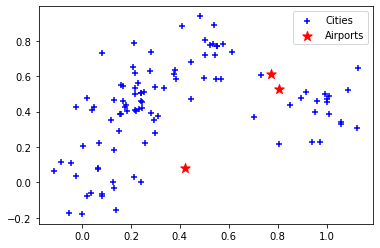

In [1]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [2]:
"""method for getting sum of squared distance between two points"""
def getDistance(point1, point2):
   return (point1[0] - point2[0])**2 + (point1[1] - point2[1])**2

"""method that takes in the airports as well as the cities 
   and returns a list containing lists of cities closest to 
   airport i (note: returned list organized by indexing of airports list
   e.g., partitionedCities[0] is the list of cities closest to airport 0) 
   O(a*c)"""
def partitionCitySet(airports, cities):
   partitionedCities = [[] for _ in range(len(airports))]

   for city in cities:
      airportDistances = []
      for airport in airports:
         airportDistances.append(getDistance(city, airport))
      partitionedCities[airportDistances.index(min(airportDistances))].append(city)

   return partitionedCities
      

partitionedCities = partitionCitySet(airports, cities)
def test(x,y,z):
   print(len(x), x, end='\n\n')
   print(len(y), y, end='\n\n')
   print(len(z), z, end='\n\n')
   # print(x + y + z)

test(*partitionedCities) 

19 [(1.0584159114251428, 0.33047588179685017), (0.9142292426682836, 0.5099734887814635), (1.0015115245529715, 0.4721122093916043), (0.9397494066700628, 0.22922685898838152), (0.7033419223712387, 0.3682103886848526), (1.0113125318343639, 0.4907754341818629), (0.894408542778487, 0.47498143461510284), (1.0113831968586893, 0.38950047977556324), (1.0006377998989922, 0.45546473275422383), (0.9602288352288258, 0.45948567047357786), (0.9723954630660571, 0.22808454677909792), (0.9529809726691228, 0.39584796846170667), (1.085345397997696, 0.5230035183553736), (1.123439142239529, 0.3099456160100023), (0.99172184685079, 0.4982321784287885), (0.8055094322857038, 0.214966790258945), (1.1287464959342235, 0.6456121770201493), (0.8512255205579362, 0.43593878999467495), (1.057475305447911, 0.34254234080116114)]

28 [(0.4449200866404268, 0.682582477174633), (0.44451320557275104, 0.46920612155296365), (0.3769350818446945, 0.6149550071378398), (0.20805321613359581, 0.6511434971132304), (0.08010073778127391

In [10]:
import copy
"""Implementation of objective function: O(abc)"""
def objectiveFun(airports, cities):
    classifiedCities = partitionCitySet(airports, cities)
    objFunStartingVal = 0

    for airport in airports:
        for cityCluster in classifiedCities:
            for city in cityCluster:
                objFunStartingVal += getDistance(airport, city)
                
    return objFunStartingVal

'''Implementation of gradient descent
   Note: the returned airports that I'm getting are all the same coordinates idk why'''
def gDescent(cities, airports, alpha, iterations):
    classifiedCities = partitionCitySet(airports, cities)
    newAirportCoordinates = []
    objectiveFunVals = []
    
    for _ in range(iterations):
        objectiveFunVals.append(objectiveFun(airports, cities))
        for airport in airports:
            dx = 0
            dy = 0
            for cityCluster in classifiedCities:
                for city in cityCluster:
                    dx += 2 * (airport[0] - city[0])
                    dy += 2 * (airport[1] - city[1])
            
            deltaCoordinates = (dx, dy)
            alphaTimesdxdy = tuple(map(lambda value: alpha * value, deltaCoordinates))
            newAirportLocation = tuple(map(lambda x,y: x-y, airport, alphaTimesdxdy))
            newAirportCoordinates.append(newAirportLocation)
            
        airports = copy.deepcopy(newAirportCoordinates)
        newAirportCoordinates.clear()

    return airports, objectiveFunVals

# print(f'objective fun before first iteration of gDescent {objectiveFun(airports, cities)}')
# newAirports, objFun = gDescent(cities, airports, 0.0069, 50)
# print(f'Airport Coordinates: {newAirports}\nnew objective fun val: {objFun}')


objective fun before first iteration of gDescent 103.02072690174383
Airport Coordinates: [(0.38237162574408495, 0.4202122308127731), (0.38237162574408495, 0.4202122308127731), (0.38237162574408495, 0.4202122308127731)]
new objective fun val: [103.02072690174383, 60.473838358939744, 54.33006765335885, 53.442907163472995, 53.31480118873344, 53.29630268598107, 53.29363150218363, 53.29324578324331, 53.29319008542829, 53.293182042663844, 53.29318088128859, 53.29318071358606, 53.2931806893698, 53.29318068587296, 53.293180685368, 53.293180685295106, 53.29318068528458, 53.29318068528301, 53.29318068528286, 53.2931806852828, 53.293180685282806, 53.29318068528273, 53.293180685282785, 53.29318068528278, 53.29318068528278, 53.29318068528278, 53.293180685282756, 53.2931806852828, 53.29318068528283, 53.293180685282735, 53.293180685282856, 53.293180685282785, 53.2931806852828, 53.293180685282756, 53.293180685282806, 53.29318068528276, 53.29318068528277, 53.29318068528277, 53.293180685282756, 53.29318

New Coordinates of Airports [(0.38237162740711067, 0.42021223122699486), (0.3823716272823915, 0.42021223157978843), (0.3823716258926653, 0.4202122294667628)]


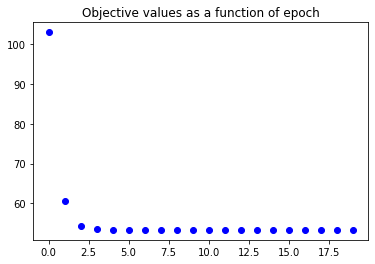

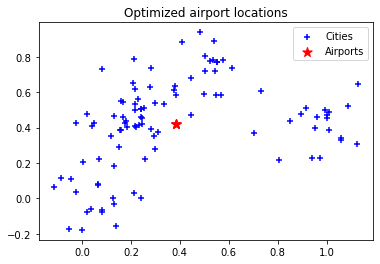

In [20]:
def main():
    iterations = 20
    alpha = 0.0069
    airportCoordinates, objectiveFunVals = gDescent(cities, airports, alpha, iterations)
    print(f'New Coordinates of Airports {airportCoordinates}')
    # print(f"Objective function values as a function of iterations: {objectiveFunVals}")



    plt.figure(0)
    plt.title("Objective values as a function of epoch")
    plt.plot(range(iterations), objectiveFunVals, "o" ,color="blue")



    plt.figure(1)
    plt.title("Optimized airport locations")
    zip_cities = zip(*cities)
    plt.scatter(*zip_cities, marker='+', color='b', label='Cities')
    zip_airs = zip(*airportCoordinates)
    plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
    plt.legend()
    plt
    

main()
